In [1]:
import functions as mf


In [2]:
df_raw = mf.load_df_raw()

                    --- Cleaning and sorting

In [3]:
df = mf.clean_main_df(df_raw)

                        --- Complete and Error rate 

In [4]:
# Error Rate calculation 

error_rate = mf.calculate_error_rate(df)
print("\nError Rate per Visit:\n", error_rate)



Error Rate per Visit:
 Variation
Control    0.302153
Test       0.441378
dtype: float64


In [5]:
# Complete Rate Calculation

completion_rate, df_last_visit = mf.calculate_completion_rate(df)
print("\nCompletion Rate per group:\n", completion_rate)



Completion Rate per group:
 Variation
Control    0.498257
Test       0.584815
Name: completed, dtype: float64


                    --- Hypothsis testing Error and complete

In [6]:
# COMPLETION RATE HYPOTHESIS

z_comp, p_comp = mf.hypothesis_completion_rate(df_last_visit)

completion_hypothesis = {"z_stat": z_comp, "p_value": p_comp}


******** COMPLETION RATE HYPOTHESIS ********
Z-statistic: 22.803
P-value: 0.0000
✅ Test group has significantly HIGHER completion rate than Control.
Test group completion rate: 58.481%
Control group completion rate: 49.826%
*******************************************


In [7]:
# ERROR RATE HYPOTHESIS

z_err, p_err = mf.hypothesis_error_rate(df)
error_hypothesis = {"z_stat": z_err, "p_value": p_err}



******** ERROR RATE HYPOTHESIS ********
Z-statistic: 19.978
P-value: 1.0000
❌ No statistical evidence that Test had fewer errors than Control.
Test group error rate: 27.119%
Control group error rate: 20.613%
***************************************


                    --- Step duration and hypothsis testing with outliers
                

In [8]:
results_with, results_clean, df_clean = mf.compare_step_durations(df)

# Save for comparison
step_results = {
    "with_outliers": results_with,
    "without_outliers": results_clean,
    "cleaned_df": df_clean
}

print("\n📊 Step Duration Results (With Outliers):")
display(step_results["with_outliers"])

print("\n📊 Step Duration Results (After Outlier Removal):")
display(step_results["without_outliers"])



================ STEP DURATION COMPARISON ================
>>> With Outliers <<<
      step  test_mean  control_mean  mean_diff  p_value  significant
1    Start      60.15         54.74      -5.41   0.9986        False
2   Step 1      37.49         42.76       5.27   0.0000         True
3   Step 2      48.01         38.59      -9.41   1.0000        False
4   Step 3      96.34         93.44      -2.91   0.9959        False
0  Confirm     112.20        124.19      11.99   0.0000         True

✅ Removed 37649 outliers using IQR filtering.

>>> After Outlier Removal <<<


/Users/muayadhilamia/Desktop/Ironhack/Week-5/Project/week5_6_project/notebooks/functions.py:313: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(remove_outliers_iqr)


      step  test_mean  control_mean  mean_diff  p_value  significant
1    Start      11.69          2.02      -9.68   1.0000        False
2   Step 1      12.81         22.39       9.58   0.0000         True
3   Step 2      28.27         26.01      -2.26   1.0000        False
4   Step 3      69.98         71.73       1.74   0.0001         True
0  Confirm      55.68         79.95      24.27   0.0000         True

🔍 Significant improvements after filtering:
✅ Step 1: Test faster by 9.58s (p = 0.0)
✅ Step 3: Test faster by 1.74s (p = 0.0001)
✅ Confirm: Test faster by 24.27s (p = 0.0)

📊 Step Duration Results (With Outliers):


,step,test_mean,control_mean,mean_diff,p_value,significant
1,Start,60.15,54.74,-5.41,0.9986,False
2,Step 1,37.49,42.76,5.27,0.0000,True
3,Step 2,48.01,38.59,-9.41,1.0000,False
4,Step 3,96.34,93.44,-2.91,0.9959,False
0,Confirm,112.20,124.19,11.99,0.0000,True



📊 Step Duration Results (After Outlier Removal):


,step,test_mean,control_mean,mean_diff,p_value,significant
1,Start,11.69,2.02,-9.68,1.0000,False
2,Step 1,12.81,22.39,9.58,0.0000,True
3,Step 2,28.27,26.01,-2.26,1.0000,False
4,Step 3,69.98,71.73,1.74,0.0001,True
0,Confirm,55.68,79.95,24.27,0.0000,True


                        --- Visualizing

/Users/muayadhilamia/Desktop/Ironhack/Week-5/Project/week5_6_project/notebooks/functions.py:351: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


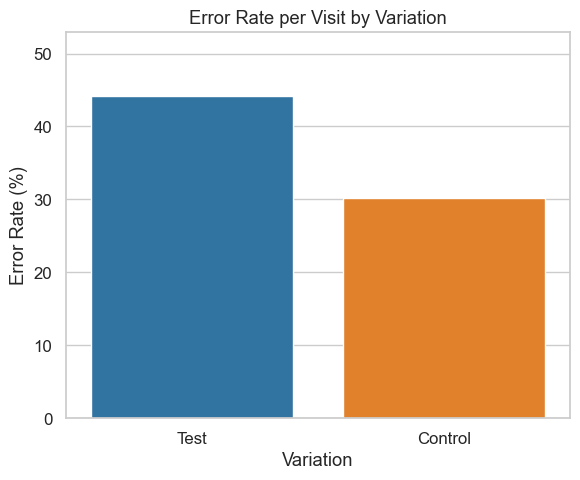

/Users/muayadhilamia/Desktop/Ironhack/Week-5/Project/week5_6_project/notebooks/functions.py:367: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


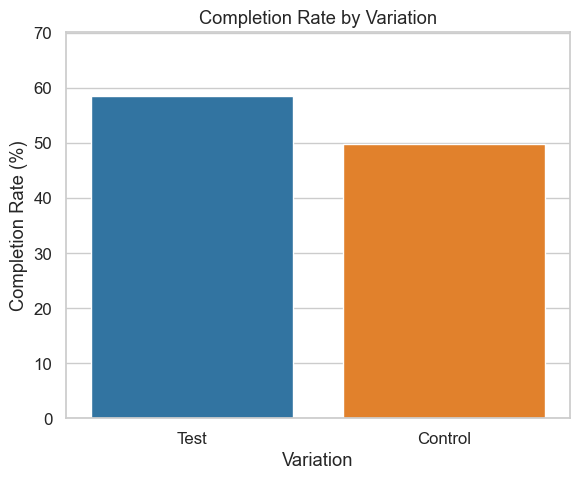

In [9]:
mf.plot_kpis(error_rate, completion_rate)



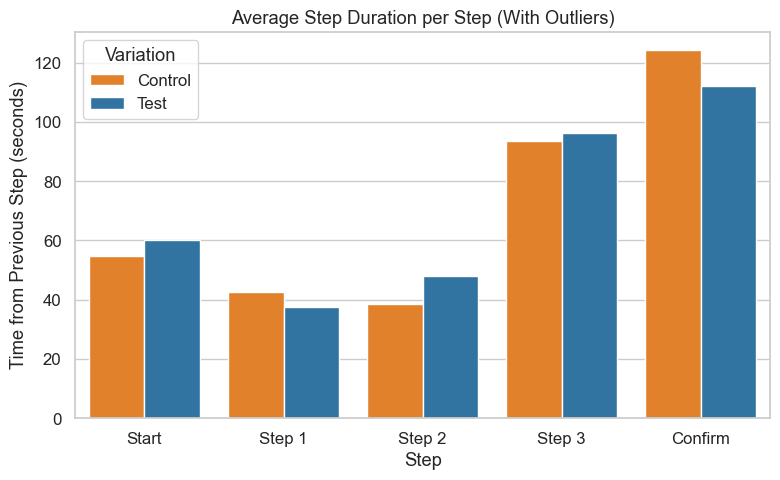

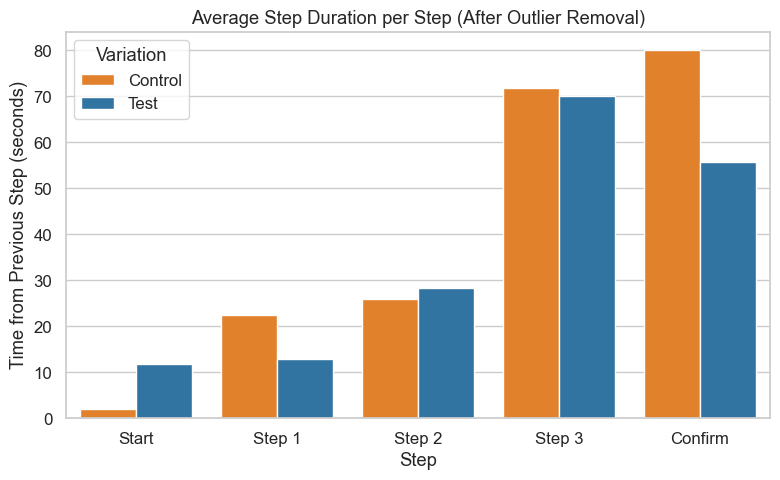

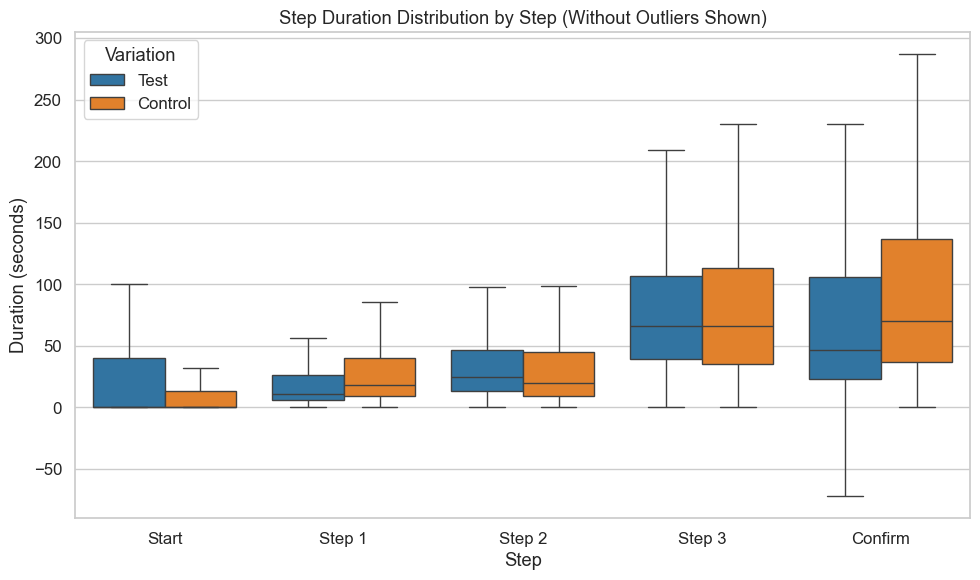

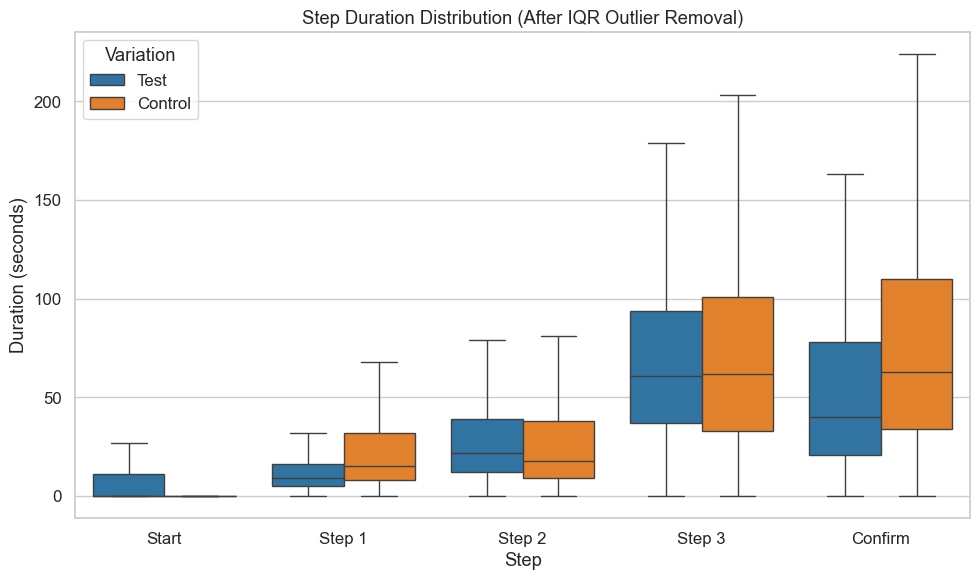

In [14]:
mf.plot_step_durations(df, df_clean)